# <span style="font-size: 30pt; color: blue;"> Analysis of Iris Flower dataset </span>


# <span style="font-size: 15pt; color:blue;"> Benjamin STAHL</span>

QUESTION :  Classify images of flowers based on their features such as the petal length, petal width, sepal length, and sepal width? Use the Iris Flowers dataset, which contains information on 150 iris flowers belonging to three different species, and apply SVM or random forest to classify the flowers.

# <span style="font-size: 22pt; color:green;"> I. Import of the different librairies  </span>

In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# <span style="font-size: 22pt; color:green;"> II. Exploratory iris data analysis  </span>

In [42]:
df_iris = pd.read_csv('IRIS_Flower_Dataset.csv')

In [43]:
df_iris.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [44]:
df_iris.tail()

sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

In [45]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [46]:
df_iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [47]:
df_iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<Axes: xlabel='petal_length', ylabel='Density'>

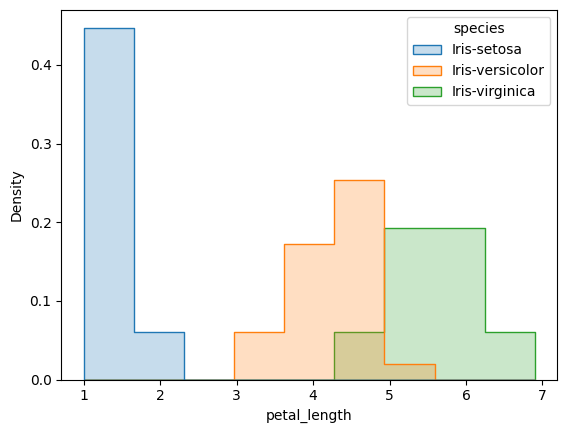

In [48]:
sns.histplot(data=df_iris, x="petal_length", hue="species", element="step", stat="density")

<Axes: xlabel='petal_length', ylabel='petal_width'>

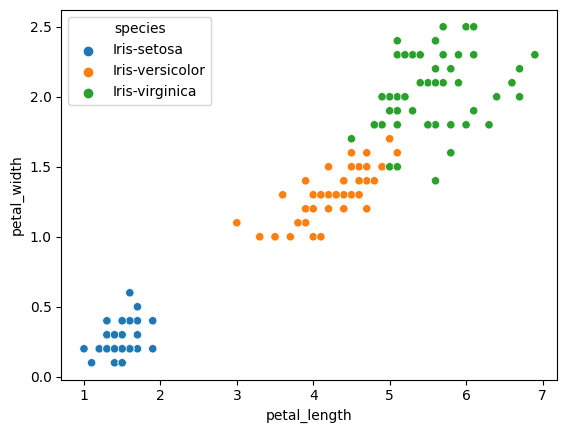

In [49]:
sns.scatterplot(data=df_iris, x="petal_length", y="petal_width", hue="species")

# <span style="font-size: 22pt; color:green;"> III. Clean/remove data if is needed</span>

In [50]:
df_iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There are no missing value, so no need to do this

We saw before with the command "df_iris.info()" that the dtype=object and we need to convert in numerical value (as we did for penguin)

In [51]:
Y=df_iris['species'].map({'Iris-setosa':0,
               'Iris-versicolor':1,
               'Iris-virginica':2})
print(Y.head())

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64


Here we have dtype=int64 !

Now we are going to create a datafram X without 'species' column

In [52]:
X = df_iris.drop(['species'], inplace=True, axis=1)
X = pd.concat([df_iris], axis=1)
X.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

# <span style="font-size: 22pt; color:green;"> IV. Split the data into train-test </span>

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [54]:
print("X_train.shape", X_train.shape)
print("Y_train.shape",y_train.shape)
print("X_test.shape",X_test.shape)
print("Y_test.shape",y_test.shape)

X_train.head()

X_train.shape (105, 4)
Y_train.shape (105,)
X_test.shape (45, 4)
Y_test.shape (45,)


sepal_length  sepal_width  petal_length  petal_width
81            5.5          2.4           3.7          1.0
133           6.3          2.8           5.1          1.5
137           6.4          3.1           5.5          1.8
75            6.6          3.0           4.4          1.4
109           7.2          3.6           6.1          2.5

# <span style="font-size: 22pt; color:green;"> V. Model and Performance improvement </span>

# <span style="font-size: 12pt; color:red;"> 1) First model is RandomForest </span>

In [55]:
rf_iris=RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=42)


hyperparameters modification are criterion, n_estimators and random_state

In [56]:
rf_iris.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

Now we do TEST

In [57]:
Y_pred_rf=rf_iris.predict(X_test)

In [58]:
Y_pred_rf

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [59]:
rep_rf=classification_report(y_test,Y_pred_rf)

In [60]:
print("The accuracy score for RandomForest model on the whole training with this hyperparameters is : ",rf_iris.score(X_train, y_train))
print("Here is the classification after having tested all the tests:\n",rep_rf)

The accuracy score for RandomForest model on the whole training with this hyperparameters is :  1.0
Here is the classification after having tested all the tests:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Here we do the confusion matrice for this model

In [61]:
conf_mat_rf=confusion_matrix(y_test,Y_pred_rf)

In [62]:
print(conf_mat_rf)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [63]:
target_names = ['setosa', 'versicolor', 'virginica']

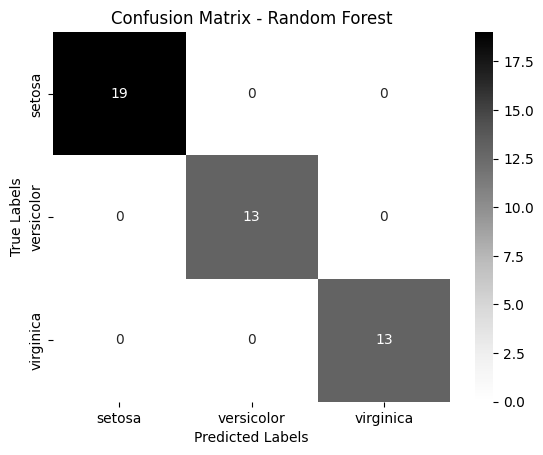

In [64]:
sns.heatmap(conf_mat_rf, annot=True, cmap='Greys',xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [65]:
feature_names = X.columns.values.tolist()
print(feature_names)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [66]:
features = pd.Series(rf_iris.feature_importances_,index=feature_names).sort_values(ascending=False)
features

petal_width     0.433663
petal_length    0.424839
sepal_length    0.109228
sepal_width     0.032271
dtype: float64

<Axes: >

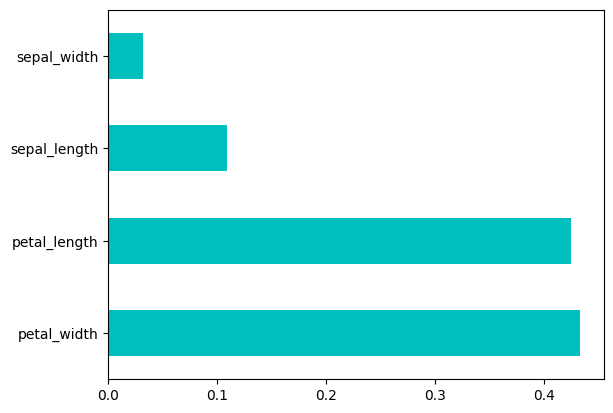

In [67]:
features.plot(kind='barh',color='c')

# <span style="font-size: 12pt; color:red;"> 2) Second model is SVM </span>

In [68]:
svm_iris = SVC(kernel='linear', C=1, gamma='auto')

hyperparameters modification are kernel, C and gamma

In [69]:
svm_iris.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='linear')

Now we do test

In [70]:
Y_pred_svm=svm_iris.predict(X_test)

In [71]:
Y_pred_svm

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [72]:
rep_iris=classification_report(y_test,Y_pred_svm)

In [73]:
print("The accuracy score for svm model on the whole training with this hyperparameters is : ",svm_iris.score(X_train, y_train))
print("Here is the classification after having tested all the tests:\n",rep_iris)

The accuracy score for svm model on the whole training with this hyperparameters is :  0.9714285714285714
Here is the classification after having tested all the tests:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Here we do the confusion matrice for this model

In [74]:
conf_mat_svm=confusion_matrix(y_test,Y_pred_svm)

In [75]:
print(conf_mat_svm)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [76]:
target_names = ['setosa', 'versicolor', 'virginica']

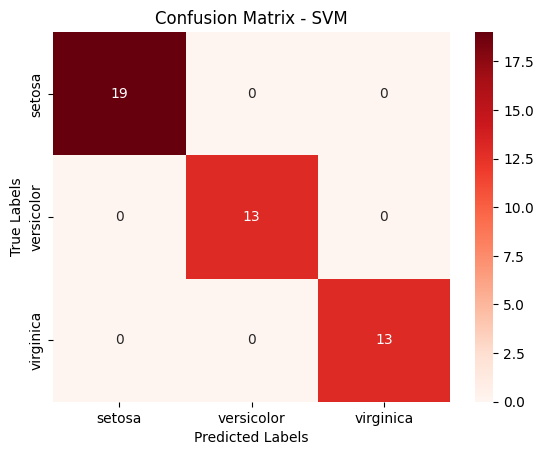

In [77]:
sns.heatmap(conf_mat_svm, annot=True, cmap='Reds',xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [78]:
feature_names = X.columns.values.tolist()
print(feature_names)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [79]:
svm_coefs = svm_iris.coef_[0]

svm_feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': svm_coefs})
svm_feature_importance = svm_feature_importance.sort_values(by='Coefficient', ascending=False)
print(svm_feature_importance)

        Feature  Coefficient
1   sepal_width     0.521056
0  sepal_length    -0.046311
3   petal_width    -0.464118
2  petal_length    -1.003016


<Axes: >

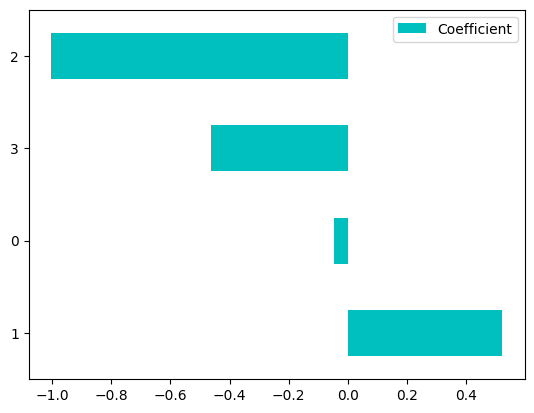

In [80]:
svm_feature_importance.plot(kind='barh',color='c')